In [2]:
import numpy as np 
import pandas as pd 

In [3]:
red = pd.read_csv('redshifts.csv')
vou = pd.read_csv('vou_100.csv')

In [4]:
red.head()

,redshift,name
0,NaN,4FGL_J0000.3-7355
1,NaN,4FGL_J0000.5+0743
2,1.106,4FGL_J0000.7+2530
3,NaN,4FGL_J0001.2+4741
4,NaN,4FGL_J0001.2-0747


In [5]:
vou.head()

,Unnamed: 0,frequency,nufnu,nufnu_upper,nufnu_lower,start_time,end_time,flag,Catalog,nufnu_err,source_name
0,1006376,1.400000e+09,3.042000e-15,3.133000e-15,2.951000e-15,55000.0,55000.0,Det,NVSS,9.100000e-17,4FGL_J0001.5+2113
1,1006377,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16,4FGL_J0001.5+2113
2,1006378,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16,4FGL_J0001.5+2113
3,1006379,3.000000e+09,5.814000e-15,5.875000e-15,5.754000e-15,55000.0,55000.0,Det,VLASSQL,6.050000e-17,4FGL_J0001.5+2113
4,1006380,2.418000e+17,5.303000e-13,8.079000e-13,2.526000e-13,55000.0,55000.0,Det,XMMSL2,2.776500e-13,4FGL_J0001.5+2113


In [150]:
vou.isnull().sum()

Unnamed: 0     0
frequency      0
nufnu          0
nufnu_upper    0
nufnu_lower    0
start_time     0
end_time       0
flag           0
Catalog        0
nufnu_err      0
source_name    0
dtype: int64

In [151]:
red.isnull().sum()

redshift    5068
name           0
dtype: int64

In [152]:
vou.rename(columns={'source_name': 'name'}, inplace=True)

In [153]:
vou

,Unnamed: 0,frequency,nufnu,nufnu_upper,nufnu_lower,start_time,end_time,flag,Catalog,nufnu_err,name
0,1006376,1.400000e+09,3.042000e-15,3.133000e-15,2.951000e-15,55000.0,55000.0,Det,NVSS,9.100000e-17,4FGL_J0001.5+2113
1,1006377,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16,4FGL_J0001.5+2113
2,1006378,8.870000e+08,1.838000e-15,1.976000e-15,1.699000e-15,55000.0,55000.0,Det,RACS,1.385000e-16,4FGL_J0001.5+2113
3,1006379,3.000000e+09,5.814000e-15,5.875000e-15,5.754000e-15,55000.0,55000.0,Det,VLASSQL,6.050000e-17,4FGL_J0001.5+2113
4,1006380,2.418000e+17,5.303000e-13,8.079000e-13,2.526000e-13,55000.0,55000.0,Det,XMMSL2,2.776500e-13,4FGL_J0001.5+2113
...,...,...,...,...,...,...,...,...,...,...,...
86199,977772,1.970000e+08,5.660000e-16,5.878000e-16,5.441000e-16,55000.0,55000.0,Det,GLEAMV2,2.185000e-17,4FGL_J0059.5-3512
86200,977773,2.040000e+08,6.272000e-16,6.520000e-16,6.024000e-16,55000.0,55000.0,Det,GLEAMV2,2.480000e-17,4FGL_J0059.5-3512
86201,977774,2.120000e+08,6.496000e-16,6.732000e-16,6.260000e-16,55000.0,55000.0,Det,GLEAMV2,2.360000e-17,4FGL_J0059.5-3512
86202,977775,2.200000e+08,5.887000e-16,6.139000e-16,5.634000e-16,55000.0,55000.0,Det,GLEAMV2,2.525000e-17,4FGL_J0059.5-3512


In [154]:
data = pd.merge(vou,red, on='name')


In [155]:
(data['flag'] == 'Det').sum()

74709

In [156]:
data.isnull().sum()

Unnamed: 0     0
frequency      0
nufnu          0
nufnu_upper    0
nufnu_lower    0
start_time     0
end_time       0
flag           0
Catalog        0
nufnu_err      0
name           0
redshift       0
dtype: int64

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



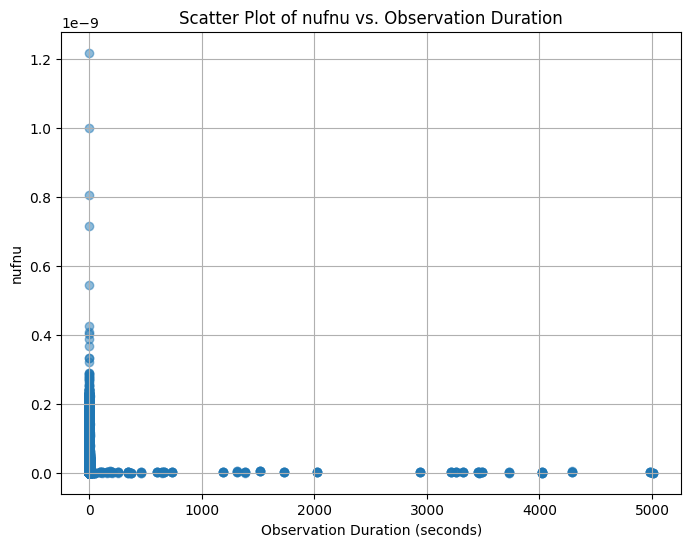

In [158]:
data['observation_duration'] = data['end_time'] - data['start_time']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['observation_duration'], data['nufnu'], alpha=0.5)
plt.title('Scatter Plot of nufnu vs. Observation Duration')
plt.xlabel('Observation Duration (seconds)')
plt.ylabel('nufnu')
plt.grid(True)
plt.show()


In [159]:
np.sum(data['nufnu_err'][data['flag']=='UL'] != 0)

3489

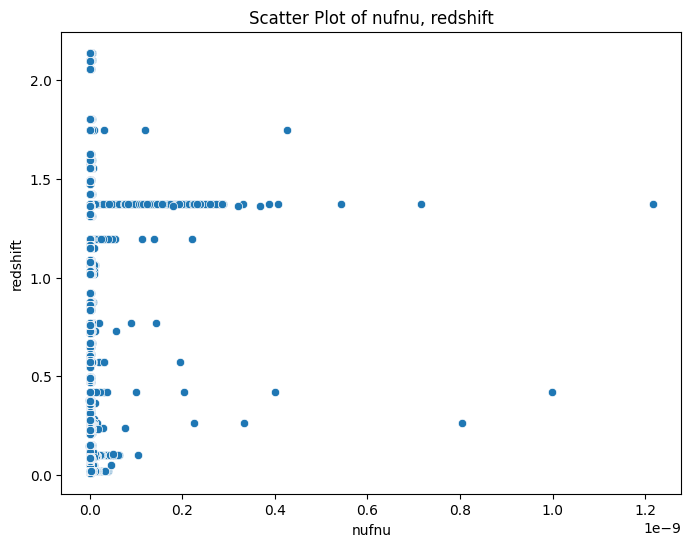

In [160]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='nufnu', y='redshift', data=data)
plt.title('Scatter Plot of nufnu, redshift')
plt.ylabel('redshift')
plt.xlabel('nufnu')
plt.show()

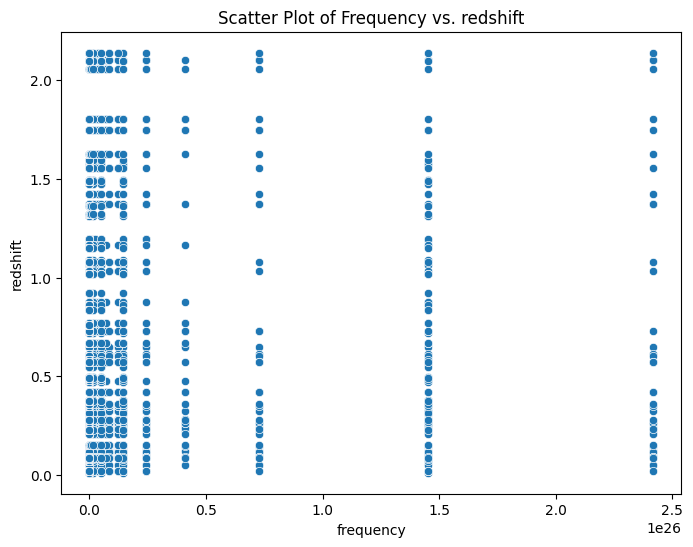

In [161]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='frequency', y='redshift', data=data)
plt.title('Scatter Plot of Frequency vs. redshift')
plt.ylabel('redshift')
plt.xlabel('frequency')
plt.show()

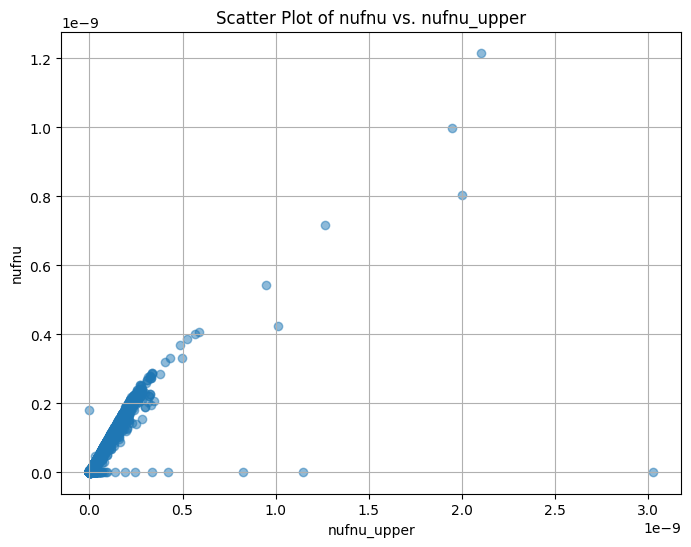

In [162]:

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['nufnu_upper'], data['nufnu'], alpha=0.5)
plt.title('Scatter Plot of nufnu vs. nufnu_upper')
plt.xlabel('nufnu_upper')
plt.ylabel('nufnu')
plt.grid(True)
plt.show()

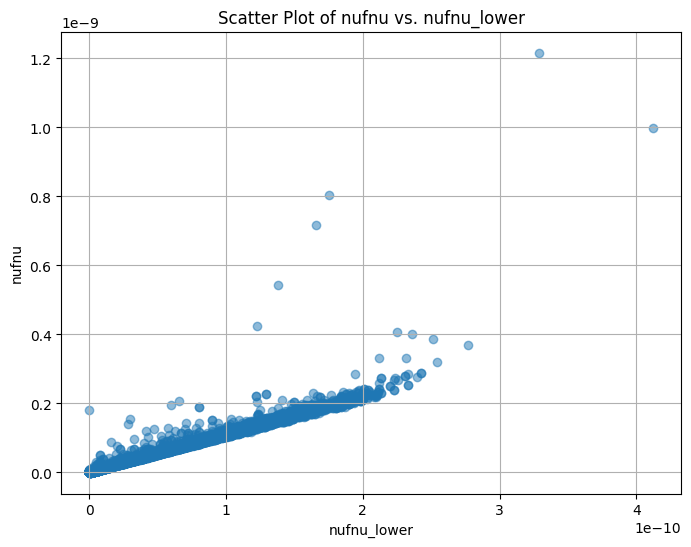

In [163]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['nufnu_lower'], data['nufnu'], alpha=0.5)
plt.title('Scatter Plot of nufnu vs. nufnu_lower')
plt.xlabel('nufnu_lower')
plt.ylabel('nufnu')
plt.grid(True)
plt.show()

In [164]:
data = data.drop(data['nufnu'][data['nufnu']>0.4*1e-9].index, axis = 0)

In [165]:
data = data.drop(data[(data['nufnu'] < 0.01 * 1e-9) & (data['nufnu_upper'] > 0.2 * 1e-10)].index, axis = 0)

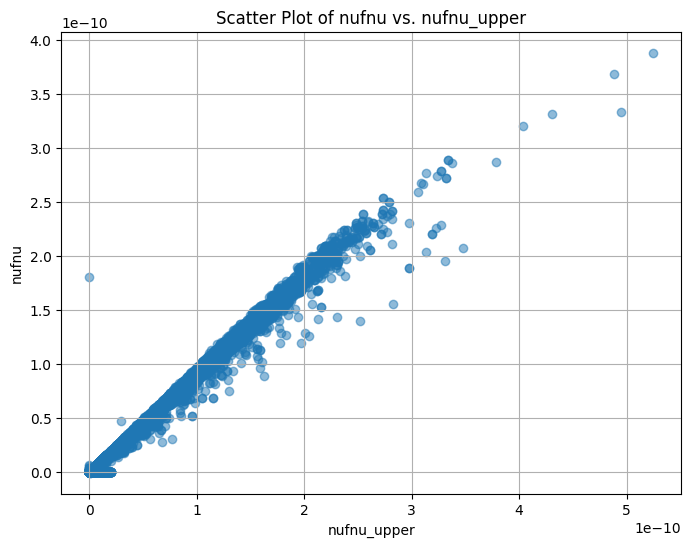

In [166]:

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['nufnu_upper'], data['nufnu'], alpha=0.5)
plt.title('Scatter Plot of nufnu vs. nufnu_upper')
plt.xlabel('nufnu_upper')
plt.ylabel('nufnu')
plt.grid(True)
plt.show()

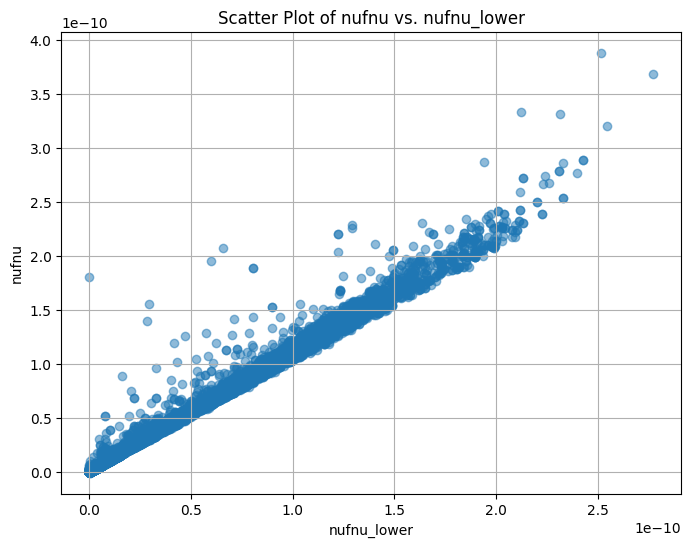

In [167]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['nufnu_lower'], data['nufnu'], alpha=0.5)
plt.title('Scatter Plot of nufnu vs. nufnu_lower')
plt.xlabel('nufnu_lower')
plt.ylabel('nufnu')
plt.grid(True)
plt.show()

In [168]:
# Calculate correlation
correlation = data['nufnu'].corr(data['nufnu_upper'])

# Print the correlation coefficient
print("Correlation between nufnu and nufnu_upper:", correlation)


Correlation between nufnu and nufnu_upper: 0.9955962115635276


In [169]:
# Calculate correlation
correlation = data['nufnu'].corr(data['nufnu_lower'])

# Print the correlation coefficient
print("Correlation between nufnu and nufnu_upper:", correlation)


Correlation between nufnu and nufnu_upper: 0.9953748201666455


In [170]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'nufnu_upper', 'nufnu_lower', 'start_time', 'end_time','observation_duration']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
data.head()

,frequency,nufnu,flag,Catalog,nufnu_err,name,redshift
0,1.400000e+09,3.042000e-15,Det,NVSS,9.100000e-17,4FGL_J0001.5+2113,0.09983
1,8.870000e+08,1.838000e-15,Det,RACS,1.385000e-16,4FGL_J0001.5+2113,0.09983
2,8.870000e+08,1.838000e-15,Det,RACS,1.385000e-16,4FGL_J0001.5+2113,0.09983
3,3.000000e+09,5.814000e-15,Det,VLASSQL,6.050000e-17,4FGL_J0001.5+2113,0.09983
4,2.418000e+17,5.303000e-13,Det,XMMSL2,2.776500e-13,4FGL_J0001.5+2113,0.09983


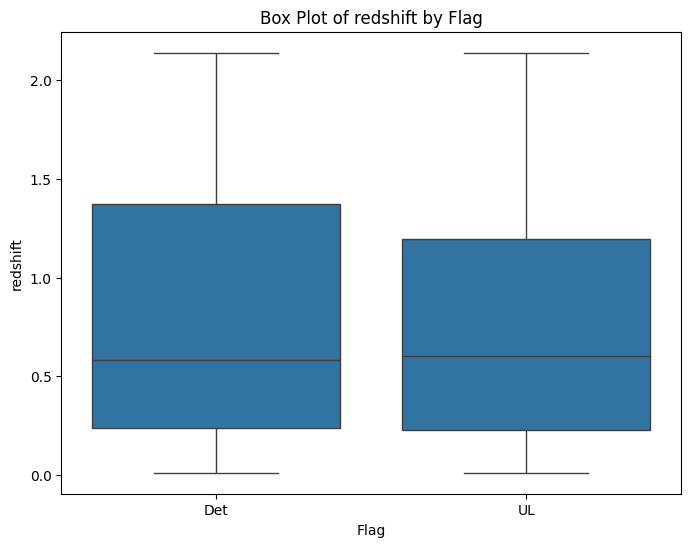

In [171]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='flag', y='redshift', data=data)
plt.title('Box Plot of redshift by Flag')
plt.xlabel('Flag')
plt.ylabel('redshift')
plt.show()

/tmp/ipykernel_41564/1456565202.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['nufnu'], shade=True)


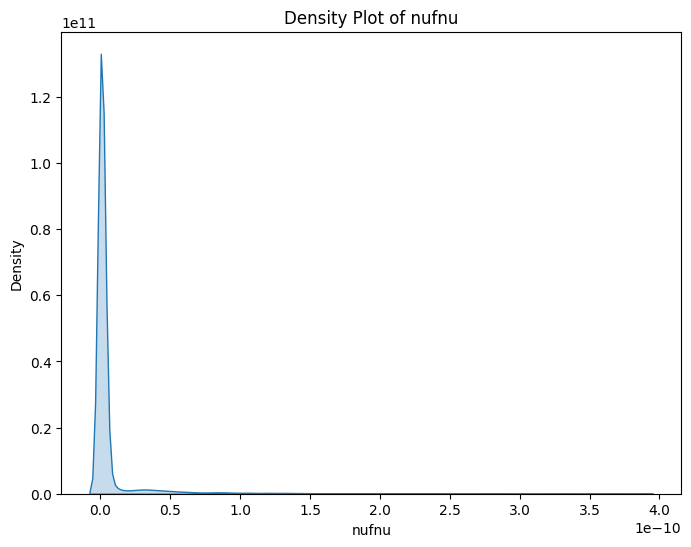

In [172]:
# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['nufnu'], shade=True)
plt.title('Density Plot of nufnu')
plt.xlabel('nufnu')
plt.ylabel('Density')
plt.show();

/tmp/ipykernel_41564/1581784687.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['frequency'], shade=True)


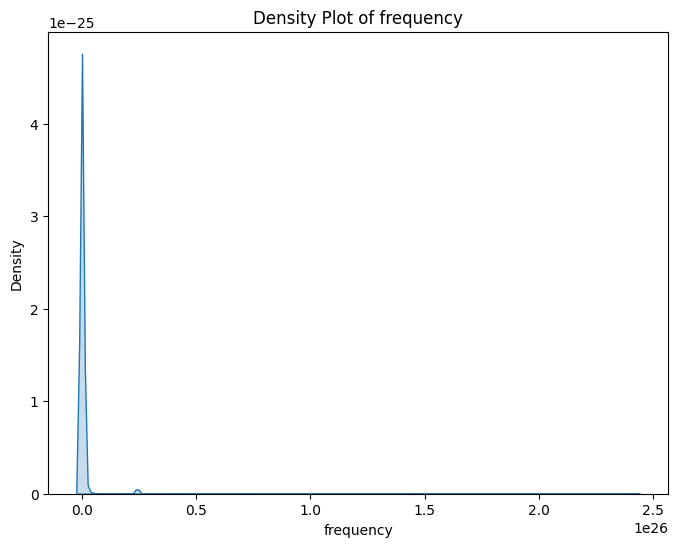

In [173]:
# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['frequency'], shade=True)
plt.title('Density Plot of frequency')
plt.xlabel('frequency')
plt.ylabel('Density')
plt.show();

/tmp/ipykernel_41564/2795003293.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['redshift'], shade=True)


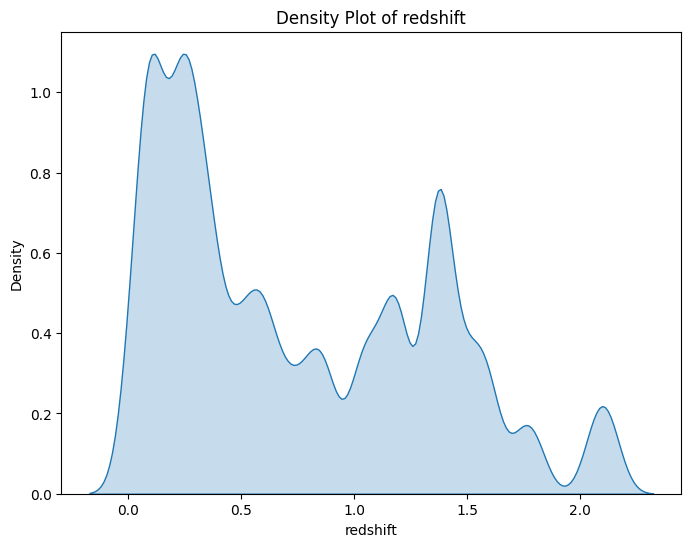

In [174]:
# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['redshift'], shade=True)
plt.title('Density Plot of redshift')
plt.xlabel('redshift')
plt.ylabel('Density')
plt.show();

In [175]:

# Perform one-hot encoding on the 'flag' column
flag_encoded = pd.get_dummies(data['flag'], prefix='flag')

# Perform one-hot encoding on the 'catalog' column
catalog_encoded = pd.get_dummies(data['Catalog'], prefix='Catalog')

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, flag_encoded, catalog_encoded], axis=1)

# Drop the original 'flag' and 'catalog' columns
data.drop(['flag', 'Catalog'], axis=1, inplace=True)

# Display the DataFrame with one-hot encoded columns
data.head()

,frequency,nufnu,nufnu_err,name,redshift,flag_Det,flag_UL,Catalog_1OUSX,Catalog_2BIGB,Catalog_2FHL,...,Catalog_UVOT,Catalog_VLASSQL,Catalog_VLSSR,Catalog_WGACAT,Catalog_WISE,Catalog_WISEME,Catalog_WISH352,Catalog_XMMOM,Catalog_XMMSL2,Catalog_XRTSPEC
0,1.400000e+09,3.042000e-15,9.100000e-17,4FGL_J0001.5+2113,0.09983,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.870000e+08,1.838000e-15,1.385000e-16,4FGL_J0001.5+2113,0.09983,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8.870000e+08,1.838000e-15,1.385000e-16,4FGL_J0001.5+2113,0.09983,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.000000e+09,5.814000e-15,6.050000e-17,4FGL_J0001.5+2113,0.09983,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2.418000e+17,5.303000e-13,2.776500e-13,4FGL_J0001.5+2113,0.09983,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
